In [6]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Boundary and initial conditions
#Temperatures
T_air = 293 #K
T_argon = 293 #K
T_LN2 = np.linspace(80,100,20) #K

# Thermal/material properties
k_SS = 14.4 #W/mK
k_Cu = 386 #W/mK
h_Air_free = 17.5 #W/m^2K

# Dimensions
t_SS = 0.0012446 #m (0.049")
r_SS = 0.00635/2 #m (1/8")
L_SS = 0.1016 #m (4")
r_Cu = 0.0381 #m (1.5")
L_Cu = 0.0254 #m (1")
W_Cu = 2*r_Cu #m (3")

In [8]:
# Caclulate Areas
A_SS = 2*np.pi*r_SS*L_SS #m^2
A_Cu_Cyl = 2*np.pi*(r_Cu**2) + 2*np.pi*r_Cu*L_Cu #m^2
A_Cu_Blk = 2*(W_Cu**2) + 4*(W_Cu*L_Cu) #m^2
A_air = 2*np.pi*(0.0254/2)*0.3254 #m^2

# Calculate Thermal Resistances
R_SS = L_SS/(k_SS*A_SS) #K/W
R_Cu_Cyl = L_Cu/(k_Cu*A_Cu_Cyl) #K/W
R_Cu_Blk = L_Cu/(k_Cu*A_Cu_Blk) #K/W
R_air = 1/(h_Air_free*A_air)
R_tot_Cyl = R_SS+R_Cu_Cyl+R_air
R_tot_Blk = R_SS+R_Cu_Blk+R_air

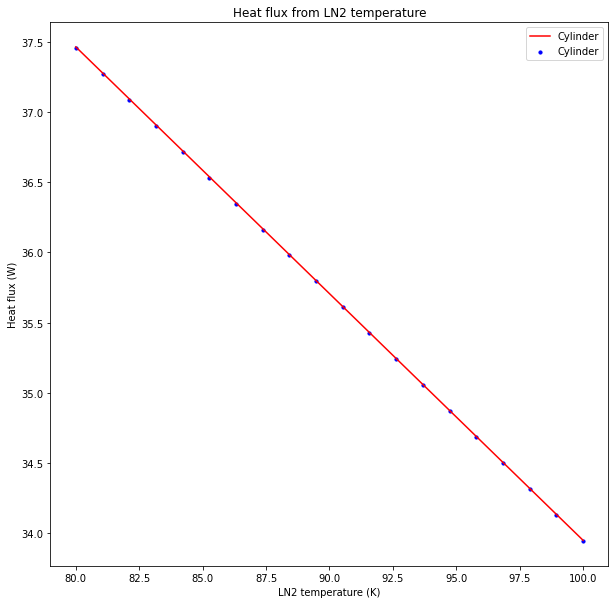

In [9]:
# Calculate total heat flux
Q_Cyl = (T_air - T_LN2)/(R_tot_Cyl)
Q_Blk = (T_air - T_LN2)/(R_tot_Blk)

# Plot heat load as a function of the LN2 temperature
QvT = plt.figure(figsize=(10,10))
QvT = plt.title("Heat flux from LN2 temperature")
QvT = plt.xlabel("LN2 temperature (K)")
QvT = plt.ylabel("Heat flux (W)")
QvT = plt.scatter(T_LN2,Q_Cyl,c="blue",label="Cylinder",s=10)
QvT = plt.plot(T_LN2,Q_Blk,color='red',label="Cylinder")
QvT = plt.legend(loc='best')
QvT = plt.show()

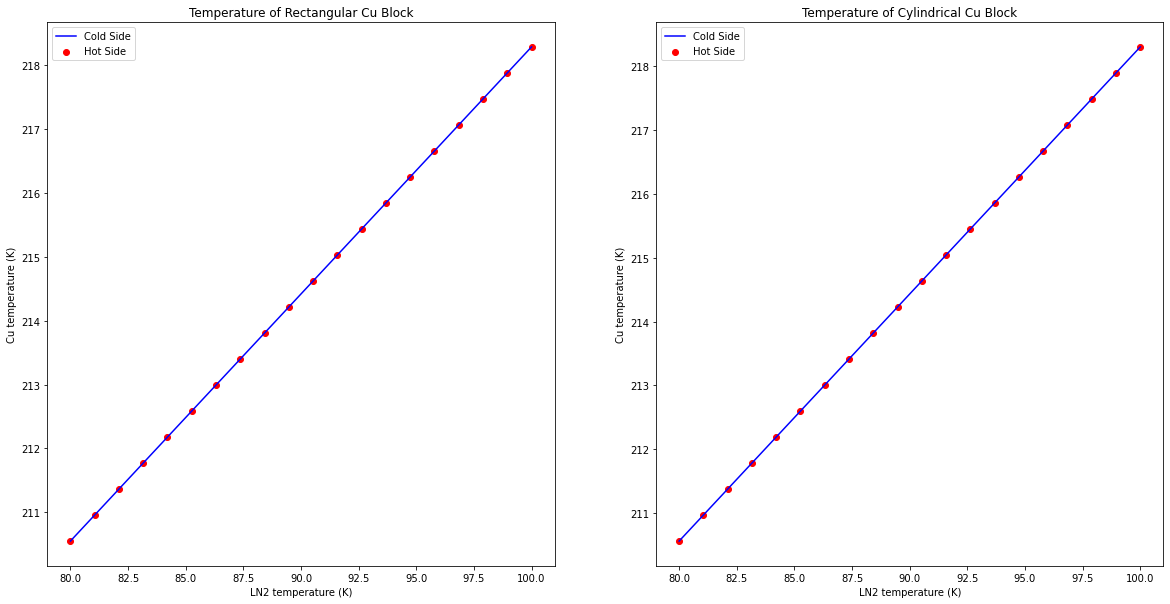

In [10]:
# Calculate the thermal resistances from both sides
R_cold_Blk = R_SS + R_Cu_Blk #K/W
R_cold_Cyl = R_SS + R_Cu_Cyl #K/W
R_hot = R_air #K/W

# Calculate the temperature of the copper block for the block and cylinder
T_Cu_cold_Blk = T_LN2 + Q_Blk*(R_Cu_Blk+R_SS)
T_Cu_hot_Blk = T_air - Q_Blk*R_hot
T_Cu_cold_Cyl = T_LN2 + Q_Cyl*(R_Cu_Cyl+R_SS)
T_Cu_hot_Cyl = T_air - Q_Cyl*R_hot

# Plot the final temperatures for each configuration as a function of LN2 temperature
TvT, (Blk, Cyl) = plt.subplots(1,2,figsize=(20,10))
Blk.set_title("Temperature of Rectangular Cu Block")
Blk.set(xlabel='LN2 temperature (K)',ylabel='Cu temperature (K)')
Blk.plot(T_LN2,T_Cu_cold_Blk,color='blue',label="Cold Side")
Blk.scatter(T_LN2,T_Cu_hot_Blk,color='red',label="Hot Side")
Blk.legend()
Cyl.set_title("Temperature of Cylindrical Cu Block")
Cyl.set(xlabel='LN2 temperature (K)',ylabel='Cu temperature (K)')
Cyl.plot(T_LN2,T_Cu_cold_Cyl,color='blue',label="Cold Side")
Cyl.scatter(T_LN2,T_Cu_hot_Cyl,color='red',label="Hot Side")
Cyl.legend()
